Problem statement : Problem is about distinguishing genuine and forged banknotes. Here we use clustering techniques to divide the type of notes. 

About the dataset : Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. A Wavelet Transform tool was used to extract features from these images. (Source: https://www.openml.org/d/1462)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv('/kaggle/input/bank-note-authentication/BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
df.shape

(1372, 5)

In [3]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

Since there are no null values we directly move to the model fitting part.

Model 1 - Here I take only the variables variance and skewness to be considered for clustering.

Text(0.5, 1.0, 'Scatter Plot of variance vs skewness')

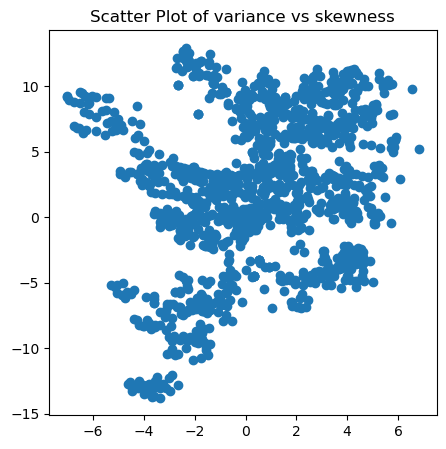

In [4]:
#scatter plots of the two variables to understand the data
plt.figure(figsize=(5,5))
plt.scatter(df['variance'],df['skewness'])
plt.title('Scatter Plot of variance vs skewness')

The data distribution is not too wide nor too centered thus we can fit our KMeans model.

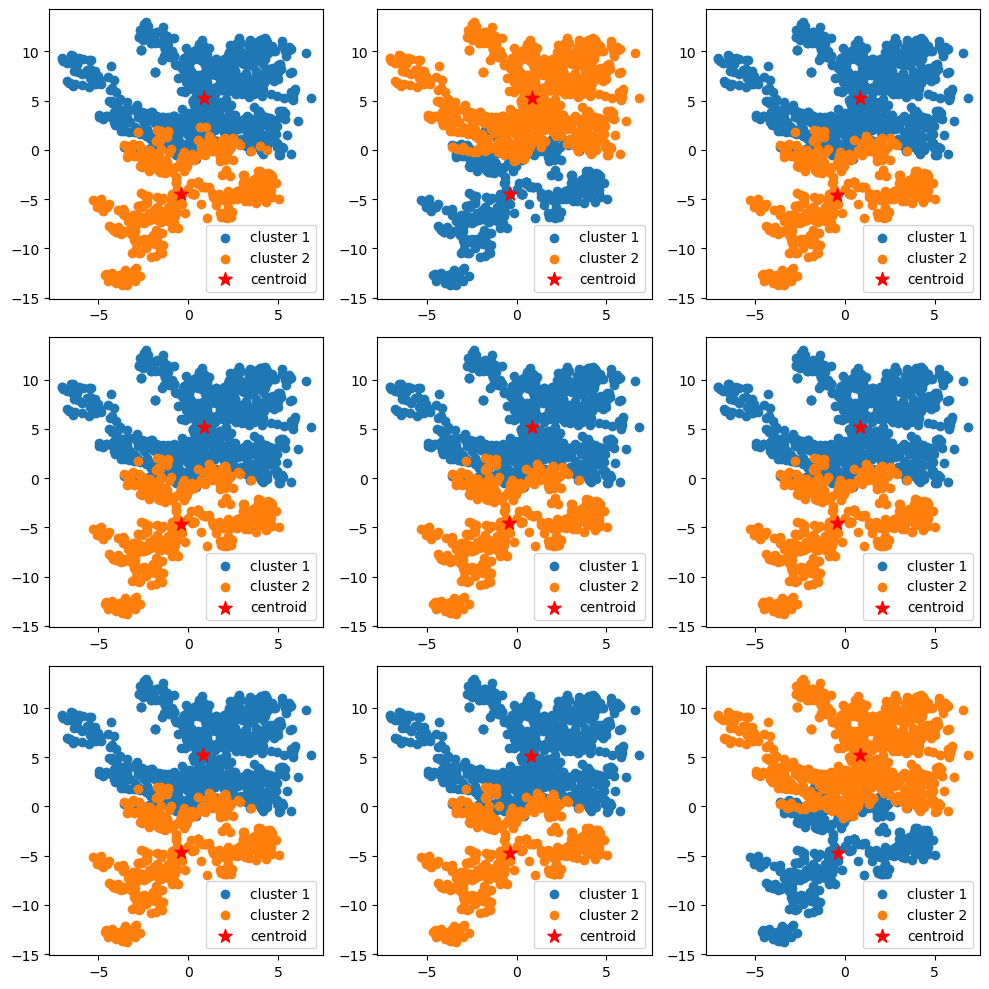

In [5]:
from sklearn.cluster import KMeans
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(10,10))
ax = np.ravel(ax)
for i in range(n_iter):
  km = KMeans(n_clusters=2,max_iter=3)
  km.fit(df)
  centroids=km.cluster_centers_
  ax[i].scatter(df[km.labels_== 0]['variance'], df[km.labels_ == 0]['skewness'],label='cluster 1')
  ax[i].scatter(df[km.labels_ == 1]['variance'], df[km.labels_ == 1]['skewness'],label='cluster 2')
  ax[i].scatter(centroids[:, 0], centroids[:, 1],c='r', marker='*', s=100, label='centroid')
  ax[i].legend()
  plt.tight_layout();

After running K-Means 9 times, the results we got are very similar, which means the K-Means here are stable.

Predicted clusters

In [6]:
df1=df.copy()
df1.drop(['curtosis','entropy','class'],axis=1,inplace=True)
df1.head()

,variance,skewness
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [7]:
from sklearn.cluster import KMeans
clusters = KMeans(2)
clusters.fit(df1)
df1['clusterid'] = clusters.labels_


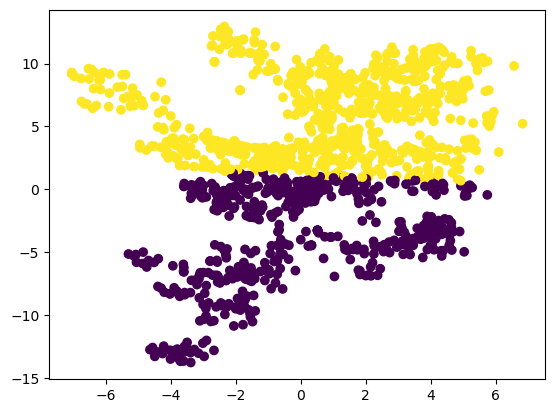

In [8]:
plt.scatter(df1['variance'],df1['skewness'],c=df1['clusterid'])

Thus we see both of them gets separated.

In [9]:
clusters.cluster_centers_

array([[-0.19838275, -3.68774038],
       [ 0.88705643,  5.94561166]])

In [10]:
df1.head()

,variance,skewness,clusterid
0,3.62160,8.6661,1
1,4.54590,8.1674,1
2,3.86600,-2.6383,0
3,3.45660,9.5228,1
4,0.32924,-4.4552,0


In [11]:
df1.groupby( 'clusterid' ).describe()

variance                                                           \
             count      mean       std     min       25%      50%       75%   
clusterid                                                                     
0            574.0 -0.200040  2.635340 -5.2943 -2.220625 -0.71681  1.924675   
1            798.0  0.889609  2.900172 -7.0421 -0.944818  1.13945  3.233900   

                  skewness                                                  \
              max    count      mean       std       min       25%     50%   
clusterid                                                                    
0          5.7403    574.0 -3.679059  3.793505 -13.77310 -6.409575 -3.2633   
1          6.8248    798.0  5.951439  3.171218   0.68906  3.129750  6.0371   

                              
                75%      max  
clusterid                     
0         -0.174348   1.2954  
1          8.725600  12.9516

Scaling the features to get the same feature range to reduce any error that may occur.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaled_df1 = scaler.fit_transform( df1[["variance", "skewness"]] ) 
scaled_df1[0:5]

array([[ 1.12180565,  1.14945512],
       [ 1.44706568,  1.06445293],
       [ 1.20780971, -0.77735215],
       [ 1.06374236,  1.29547754],
       [-0.03677175, -1.0870383 ]])

In [13]:
scaled_df1=pd.DataFrame(scaled_df1,columns=['variance','skewness'])
scaled_df1

,variance,skewness
0,1.121806,1.149455
1,1.447066,1.064453
2,1.207810,-0.777352
3,1.063742,1.295478
4,-0.036772,-1.087038
...,...,...
1367,-0.009711,-0.097693
1368,-0.641313,-1.158984
1369,-1.472357,-2.621646
1370,-1.406693,-1.756471


Refitting the model

In [14]:
from sklearn.cluster import KMeans 
clusters_new = KMeans( 2, random_state=42 ) 
clusters_new.fit( scaled_df1 ) 
df1["clusterid_new"] = clusters_new.labels_ 
df1.head()

,variance,skewness,clusterid,clusterid_new
0,3.62160,8.6661,1,1
1,4.54590,8.1674,1,1
2,3.86600,-2.6383,0,1
3,3.45660,9.5228,1,1
4,0.32924,-4.4552,0,0


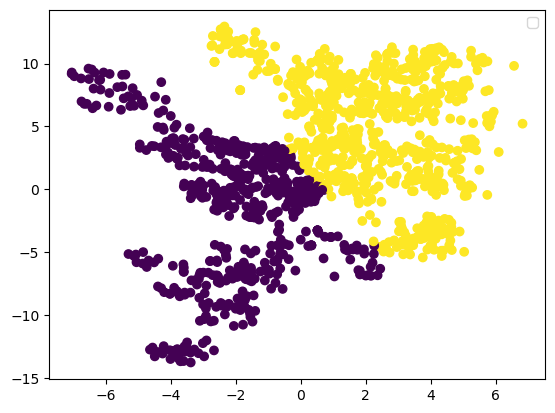

In [15]:
plt.scatter(df1['variance'],df1['skewness'],c=df1['clusterid_new'])
plt.legend()

Visualizing the data with correct labels.

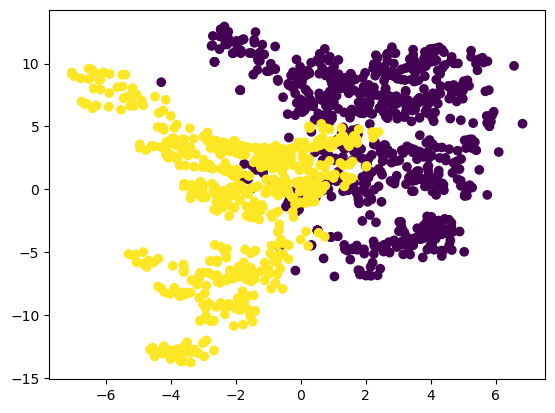

In [16]:
plt.scatter(df['variance'],df['skewness'],c=df['class'])

In [17]:
clusters_new.cluster_centers_

array([[-0.84814093, -0.62921303],
       [ 0.65722693,  0.48757905]])

In [18]:
df1["clusterid_new"] = df1["clusterid_new"].map({0: 1, 1: 0})

In [19]:
df1.shape

(1372, 4)

In [20]:
df1=df1.reset_index()
df1

,index,variance,skewness,clusterid,clusterid_new
0,0,3.62160,8.66610,1,0
1,1,4.54590,8.16740,1,0
2,2,3.86600,-2.63830,0,0
3,3,3.45660,9.52280,1,0
4,4,0.32924,-4.45520,0,1
...,...,...,...,...,...
1367,1367,0.40614,1.34920,1,0
1368,1368,-1.38870,-4.87730,0,1
1369,1369,-3.75030,-13.45860,0,1
1370,1370,-3.56370,-8.38270,0,1


In [21]:
correct=0
for i in range(0,1371):
  if df['class'][i]==df1['clusterid_new'][i]:
   correct=correct+1

print(correct/1371)

0.8774617067833698


Thus our model is 87.9% perfect. In general we don't have the class and so we cannot compare like this. Since it is a unsupervised type of learning we can only make the clusters.

Model 2 - I use PCA to reduce the number of features and hence to segment the data using Agglomerative clustering. Here I cannot compare with the predicted results like the previous one. My only motive for this is to make clusters not only for perfect note and forged banknotes but to make clusters of different note types based on the features.

In [22]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaled_df2 = scaler.fit_transform( df[["variance", "skewness","curtosis","entropy"]] ) 
scaled_df2[0:5]

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       [ 1.06374236,  1.29547754, -1.25539712, -1.14402883],
       [-0.03677175, -1.0870383 ,  0.73673042,  0.09658697]])

In [24]:
scaled_df2=pd.DataFrame(scaled_df2,columns=['variance','skewness',"curtosis","entropy"])
scaled_df2

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


In [25]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(scaled_df2)
PCA_df=pd.DataFrame(pca.transform(scaled_df2),columns=(['col1','col2']))
PCA_df.head()

,col1,col2
0,-1.472805,-1.163917
1,-1.639441,-1.093812
2,0.513919,-1.324880
3,-2.310952,-0.202514
4,1.193416,0.024654


Text(0.5, 1.0, 'Scatter Plot of col1 vs col2')

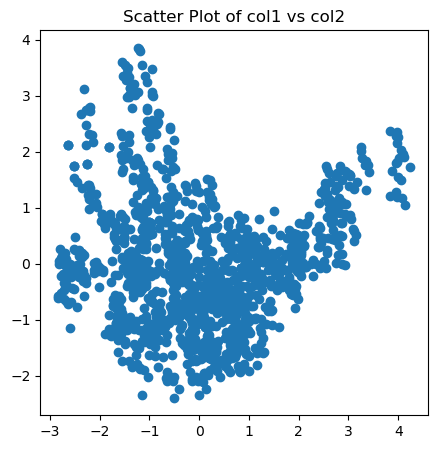

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(PCA_df['col1'],PCA_df['col2'])
plt.title('Scatter Plot of col1 vs col2')

Trying to find the number of clusters required.

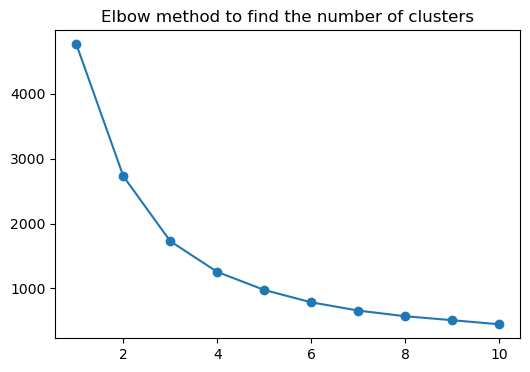

In [27]:
from sklearn.cluster import KMeans


cluster_range=range(1,11)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(PCA_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker='o')
plt.title('Elbow method to find the number of clusters')
plt.show()

We need 4 clusters.

Now i'm fitting the model.

In [28]:
from sklearn.cluster import AgglomerativeClustering

AC=AgglomerativeClustering(n_clusters=4)
AC.fit(PCA_df)

yhat_AC=AC.fit_predict(PCA_df)
yhat_AC

array([1, 1, 0, ..., 2, 2, 2])

In [29]:
PCA_df['Clusters']=yhat_AC
PCA_df

,col1,col2,Clusters
0,-1.472805,-1.163917,1
1,-1.639441,-1.093812,1
2,0.513919,-1.324880,0
3,-2.310952,-0.202514,1
4,1.193416,0.024654,2
...,...,...,...
1367,-0.221995,-0.290458,0
1368,1.909395,0.142149,2
1369,4.049327,2.036023,2
1370,3.019617,1.392140,2


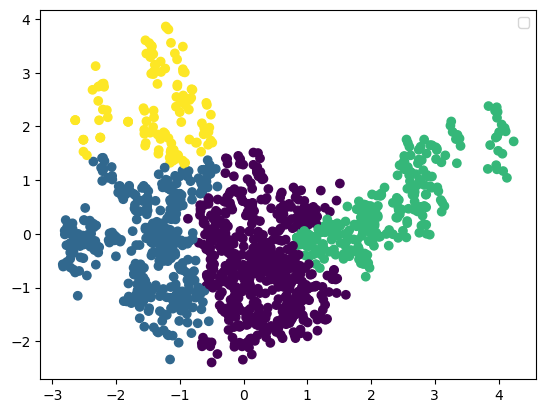

In [30]:
plt.scatter(PCA_df['col1'],PCA_df['col2'],c=PCA_df['Clusters'])
plt.legend()

Thus I get the different clusters which signifies the different types of notes based on the features.